<a href="https://colab.research.google.com/github/PathanZeba/Market-Segmentation/blob/main/Zeba_khanam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Segmentation Analysis  
**McDonald's (Fast Food) Case Study**  
***By Zeba Khanam***  

---

###  Steps Covered in This Study:
-   **Step 1 to 3**: Theoretical understanding of segmentation basics and data collection
-  **Step 8: Selecting the Target Segment**
-  **Step 9: Customising the Marketing Mix**

These steps were implemented using Python, including clustering, segment evaluation, decision tree classification, and 4Ps strategy development.


##8. Selecting Target Segment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
# Load Dataset
df = pd.read_csv('McDonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [ ]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [ ]:
df.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
def explore_column_counts(df, columns):
    for col in columns:
        print(f"\n {col} Value Counts:")
        print(df[col].value_counts())


explore_column_counts(df, ['Gender', 'VisitFrequency', 'Like'])



 Gender Value Counts:
Gender
Female    788
Male      665
Name: count, dtype: int64

 VisitFrequency Value Counts:
VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

 Like Value Counts:
Like
3               229
2               187
0               169
4               160
1               152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64


In [ ]:
# VisitFrequency
visit_map = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_map)


In [ ]:
# Gender
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})


In [ ]:
#Convert 'Like' to Numeric
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')


In [ ]:
#Convert Yes/No Columns to 1/0
perception_cols = ['yummy','convenient','spicy','fattening','greasy',
                   'fast','cheap','tasty','expensive','healthy','disgusting']

df[perception_cols] = df[perception_cols].replace({'Yes': 1, 'No': 0})


<ipython-input-12-2529921681>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[perception_cols] = df[perception_cols].replace({'Yes': 1, 'No': 0})


In [ ]:
required_cols = perception_cols + ['Like', 'Age', 'VisitFrequency', 'Gender']
df_cleaned = df.dropna(subset=required_cols).copy()


In [ ]:
#Scale Features
features = perception_cols + ['Like', 'Age', 'VisitFrequency', 'Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])


In [ ]:
#KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['k4'] = kmeans.fit_predict(X_scaled) + 1
df_cleaned['k4'].value_counts()


,count
k4,
2,476
4,323
1,255
3,104


In [ ]:
#Segment Evaluation
summary = df_cleaned.groupby('k4').agg({
    'VisitFrequency': 'mean',
    'Like': 'mean',
    'Gender': 'mean'
}).reset_index()

summary.columns = ['Segment', 'Mean_Visit', 'Mean_Like', 'Percent_Female']
summary


,Segment,Mean_Visit,Mean_Like,Percent_Female
0,1,2.800000,1.890196,0.462745
1,2,2.905462,2.397059,0.592437
2,3,2.096154,-0.346154,0.413462
3,4,1.609907,-1.278638,0.566563


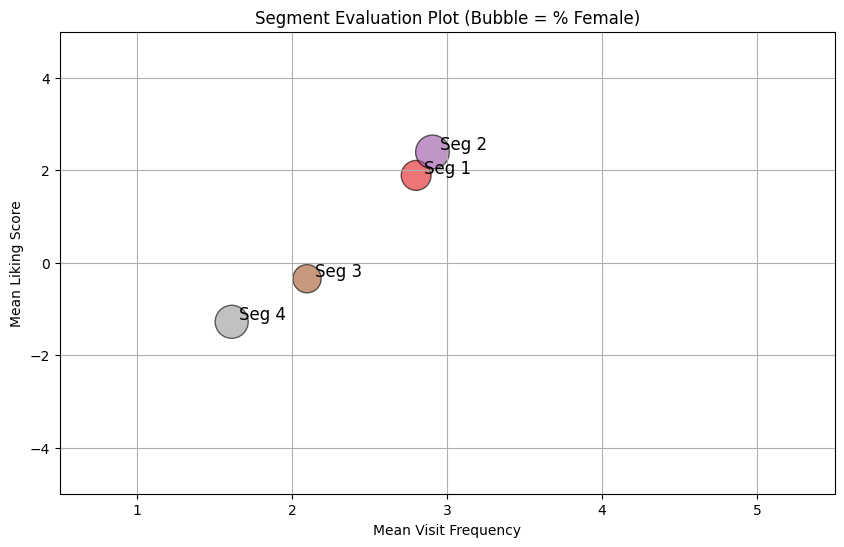

In [ ]:
# Segment Evaluation Bubble Plot with labels
plt.figure(figsize=(10, 6))
plt.scatter(summary['Mean_Visit'], summary['Mean_Like'],
            s=summary['Percent_Female'] * 1000,
            c=summary['Segment'], cmap='Set1', alpha=0.6, edgecolors='black')


for i, row in summary.iterrows():
    plt.text(row['Mean_Visit'] + 0.05, row['Mean_Like'] + 0.05,
             f"Seg {int(row['Segment'])}", fontsize=12)

plt.xlabel("Mean Visit Frequency")
plt.ylabel("Mean Liking Score")
plt.title("Segment Evaluation Plot (Bubble = % Female)")
plt.grid(True)
plt.xlim(0.5, 5.5)
plt.ylim(-5, 5)
plt.show()


In [ ]:
#Decision Tree
df_cleaned['is_segment_3'] = (df_cleaned['k4'] == 3).astype(int)



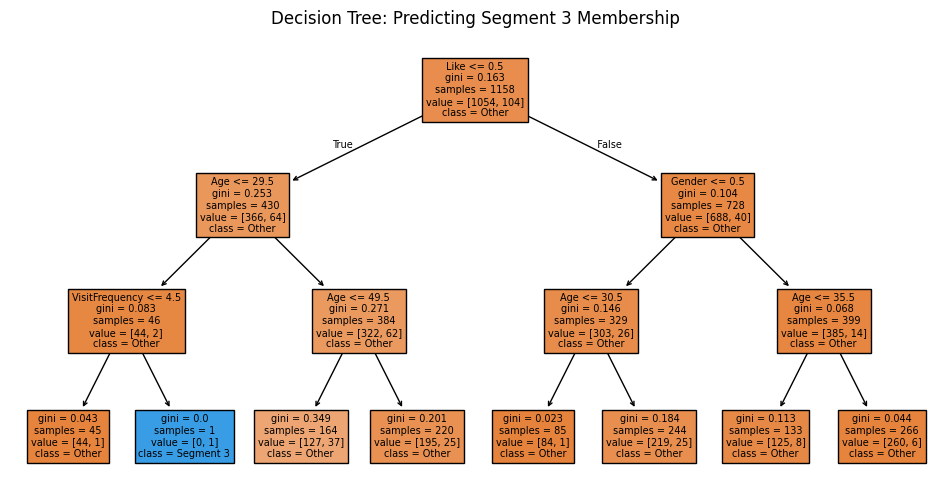

In [ ]:
X = df_cleaned[['Like', 'VisitFrequency', 'Age', 'Gender']]
y = df_cleaned['is_segment_3']

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Other', 'Segment 3'], filled=True)
plt.title("Decision Tree: Predicting Segment 3 Membership")
plt.show()


## 9. Customising the Marketing Mix for Segment 3

In alignment with the PDF case study, our Python-based segmentation and decision tree analysis identifies Segment 3 as a key target group. Customers in this segment:

- Have a high liking score for McDonald’s
- Visit McDonald’s frequently (at least once a week)
- Are predominantly younger in age
- Perceive McDonald’s as slightly expensive

To effectively engage and retain this segment, we propose a tailored marketing mix based on the 4Ps:

###  Product
McDonald’s can introduce a dedicated value menu, such as a **McSUPERBUDGET** line, offering affordable yet appealing items. This menu should maintain the brand's core taste while being distinct from the premium offerings.

###  Price
- Set lower price points (e.g., ₹79–₹99 meal combos)
- Include student discounts, loyalty coupons, or app-based rewards to reinforce engagement

###  Place
- Serve the McSUPERBUDGET line through existing outlets
- Consider creating a separate counter or ordering lane to avoid affecting premium service flow

###  Promotion
- Focus marketing efforts on youth-centric platforms like Instagram, YouTube, and Snapchat
- Collaborate with social media influencers and design messages that emphasize value, fun, and taste

###  Strategic Goal
Segment 3 already demonstrates brand affinity. By addressing their price sensitivity, McDonald’s can build long-term loyalty. As these customers mature and their purchasing power increases, they are likely to transition to the brand’s regular premium offerings.
